# College Dropout Rate Analysis after the second semester


## The Machine Learning Engine::

In [112]:
import pandas as pd
import seaborn
from sklearn import linear_model, model_selection, svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

names = ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance',
         'Previous qualification', 'Nationality', 'Mother\'s qualification',
         'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
         'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
         'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'CU 1st sem (enrolled)',
         'CU 1st sem (approved)', 'CU 1st sem (evaluations)', 'CU 1st sem (grade)', 'CU 1st sem (credited)',
         'CU 1st sem (without evaluations)',
         'CU 2nd sem (credited)', 'CU 2nd sem (enrolled)', 'CU 2nd sem (evaluations)', 'CU 2nd sem (approved)',
         'CU 2nd sem (grade)',
         'CU 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Output']
# Load the data
df = pd.read_csv('data3.csv', names=names)

# create models
mylog_model = linear_model.LogisticRegression(max_iter=2000)  # linear regression model
myrf_model = RandomForestClassifier()  # random forest model
mysvm_model = svm.SVC(kernel='linear', probability=True)  # support vector machine model
mygb_model = GradientBoostingClassifier()  # GradientBoostingClassifier model
myxgb_model = xgb.XGBClassifier()  # xgboost model
ab_model = AdaBoostClassifier(algorithm='SAMME')  # AdaBoostClassifier model
et_model = ExtraTreesClassifier()  # ExtraTreesClassifier model

y = df.values[:, 34]
X = df.values[:, 0:34]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, )

# create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', mylog_model), ('rf', myrf_model), ('svm', mysvm_model),
                                          ('gbc', mygb_model), ('xgb', myxgb_model), ('ab', ab_model),
                                          ('et', et_model)], voting='soft')

# train the  models
mylog_model.fit(X_train, y_train)  # linear regression model
myrf_model.fit(X_train, y_train)  # random forest model
mysvm_model.fit(X_train, y_train)  # support vector machine model
mygb_model.fit(X_train, y_train)  # GradientBoostingClassifier model
myxgb_model.fit(X_train, y_train)  # xgboost model
ab_model.fit(X_train, y_train)  # AdaBoostClassifier model
et_model.fit(X_train, y_train)  # ExtraTreesClassifier model
voting_clf.fit(X_train, y_train) # VotingClassifier model


# predict the outputs using the test data
y_pred = mylog_model.predict(X_test)  # linear regression model
y_pred_rf = myrf_model.predict(X_test)  # random forest model
y_pred_svm = mysvm_model.predict(X_test)  # support vector machine model
y_pred_gb = mygb_model.predict(X_test)  # GradientBoostingClassifier model
y_pred_xgb = myxgb_model.predict(X_test)  # xgboost model
y_pred_ab = ab_model.predict(X_test)  # AdaBoostClassifier model
y_pred_et = et_model.predict(X_test)  # ExtraTreesClassifier model


# set a dataset to test the models
dataset = [[1,1,1,12,1,1,1,13,28,8,11,1,0,0,1,0,1,18,0,7,7,9,13.3,0,0,0,8,8,8,14.345,0,15.5,2.8,-4.06]]
#dataset = [[1,1,1,16,1,1,1,13,14,6,8,0,0,0,1,0,1,18,0,6,5,8,13.4,0,0,0,6,7,6,13.16666667,0,9.4,-0.8,-3.12]]
#dataset = [[2,12,1,14,1,1,1,22,27,10,1,0,0,1,0,0,0,34,0,6,4,7,13.5,0,0,0,6,6,0,0,6,12.7,3.7,-1.7]]


# create variables to store the prediction of the output for all the models
linear_prediction = mylog_model.predict(dataset)
random_forest_prediction = myrf_model.predict(dataset)
svm_prediction = mysvm_model.predict(dataset)
gbc_prediction = mygb_model.predict(dataset)
xgboost_prediction = myxgb_model.predict(dataset)
ab_prediction = ab_model.predict(dataset)
et_prediction = et_model.predict(dataset)

# print out the accuracy of the models
print("for the dataset:", dataset)
print("linear regression predicts:", linear_prediction, "and has an accuracy of:",
      mylog_model.score(X_test, y_test))
print("random forest predicts:", random_forest_prediction, "and has an accuracy of:",
      myrf_model.score(X_test, y_test))
print("support vector machine predicts:", svm_prediction, "and has an accuracy of:",
      mysvm_model.score(X_test, y_test))
print("GradientBoostingClassifier predicts:", gbc_prediction, "and has an accuracy of:",
      mygb_model.score(X_test, y_test))
print("xgboost predicts:", xgboost_prediction, "and has an accuracy of:", myxgb_model.score(X_test, y_test))
print("AdaBoost predicts:", ab_prediction, "and has an accuracy of:", ab_model.score(X_test, y_test))
print("Extra Trees predicts:", et_prediction, "and has an accuracy of:", et_model.score(X_test, y_test))

print("Voting Classifier predicts:", voting_clf.predict(dataset), "and has an accuracy of:",
      voting_clf.score(X_test, y_test))

for the dataset: [[1, 1, 1, 12, 1, 1, 1, 13, 28, 8, 11, 1, 0, 0, 1, 0, 1, 18, 0, 7, 7, 9, 13.3, 0, 0, 0, 8, 8, 8, 14.345, 0, 15.5, 2.8, -4.06]]
linear regression predicts: [1.] and has an accuracy of: 0.9082483781278962
random forest predicts: [1.] and has an accuracy of: 0.8999073215940686
support vector machine predicts: [1.] and has an accuracy of: 0.9138090824837812
GradientBoostingClassifier predicts: [1.] and has an accuracy of: 0.9101019462465245
xgboost predicts: [1] and has an accuracy of: 0.8980537534754403
AdaBoost predicts: [1.] and has an accuracy of: 0.891566265060241
Extra Trees predicts: [1.] and has an accuracy of: 0.901760889712697
Voting Classifier predicts: [1.] and has an accuracy of: 0.9119555143651529


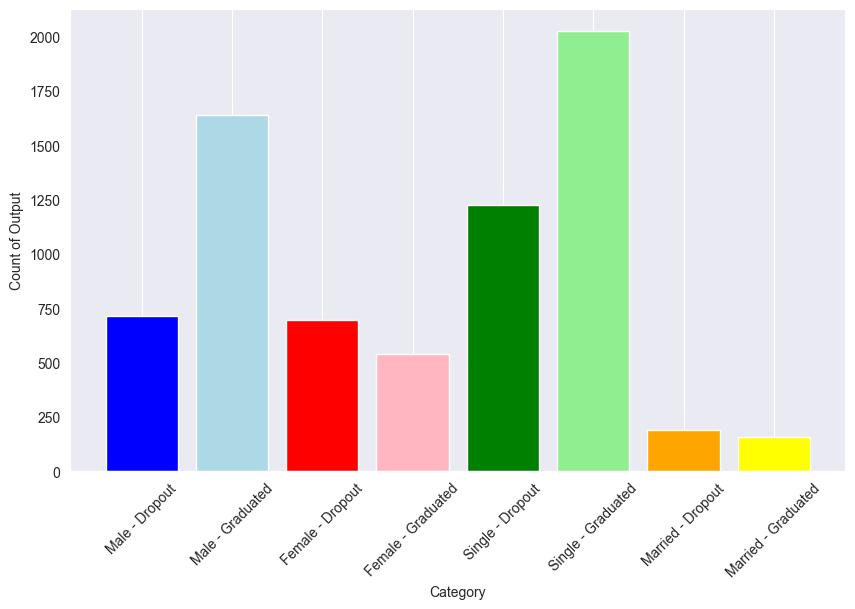

In [117]:
from matplotlib import pyplot as plt

# Calculate the number of times Output was 0 and 1 for Male and Female
output_count = df.groupby(['Gender', 'Output'])['Output'].count().unstack(fill_value=0)

# Define marital status groups
single_status = [1, 3, 4, 6]
married_status = [2, 5]

# Calculate the number of times Output was 0 and 1 for Single and Married
single_output_count = df[df['Marital status'].isin(single_status)].groupby('Output')['Output'].count()
married_output_count = df[df['Marital status'].isin(married_status)].groupby('Output')['Output'].count()

# Create a bar chart for the number of times Output was 0 and 1 for Male, Female, Single, and Married
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Male - Dropout', 'Male - Graduated', 'Female - Dropout', 'Female - Graduated',  'Single - Dropout', 'Single - Graduated','Married - Dropout', 'Married - Graduated']
values = [
    output_count.loc[0, 0], output_count.loc[0, 1], 
    output_count.loc[1, 0], output_count.loc[1, 1], 
    single_output_count.get(0, 0), single_output_count.get(1, 0), 
    married_output_count.get(0, 0), married_output_count.get(1, 0)
]
colors = ['blue', 'lightblue', 'red', 'lightpink', 'green', 'lightgreen', 'orange', 'yellow']

ax.bar(categories, values, color=colors)

# Customize the chart
ax.set_xlabel('Category')
ax.set_ylabel('Count of Output')
ax.grid(axis='y')
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


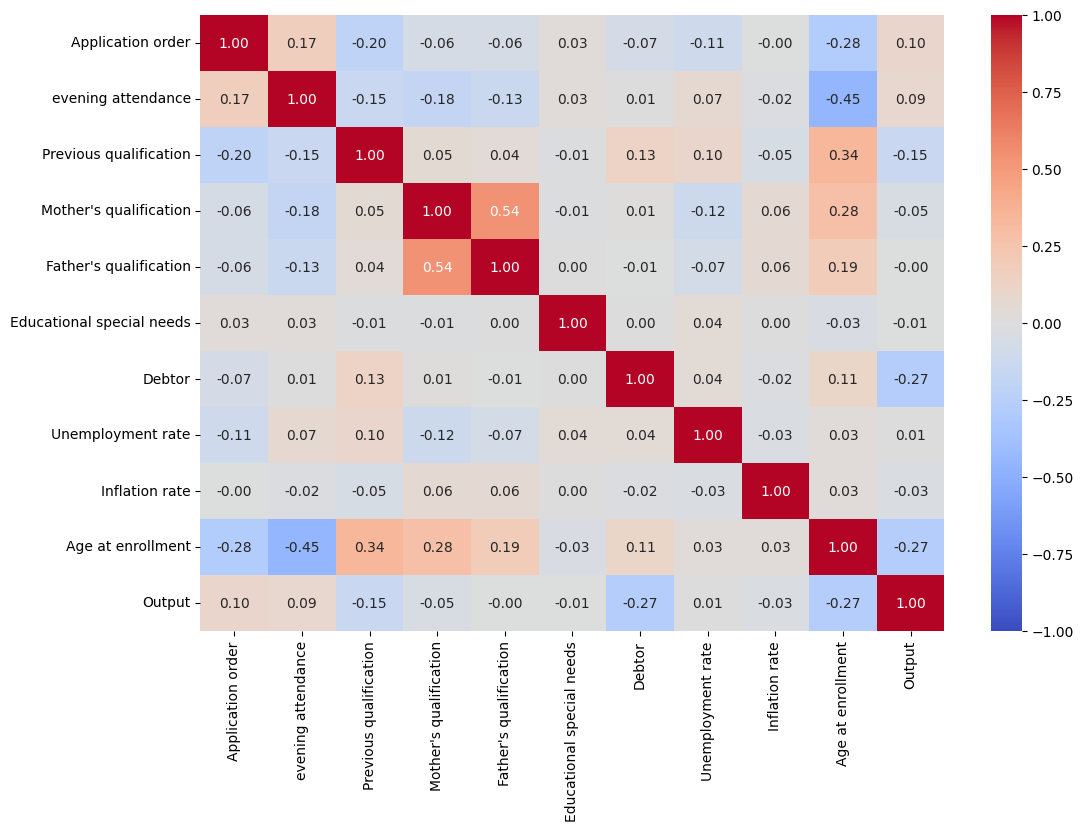

In [88]:
# Select relevant numeric columns for the new correlation matrix
selected_columns_new = [
    'Application order', 'evening attendance', 'Previous qualification', 
    'Mother\'s qualification', 'Father\'s qualification', 'Educational special needs', 
    'Debtor', 'Unemployment rate', 'Inflation rate', 'Age at enrollment', 'Output'
]
selected_data_new = df[selected_columns_new]

# Calculate the correlation matrix for the selected columns
corr_matrix_new = selected_data_new.corr()

# Create a heatmap for the new selected columns
plt.figure(figsize=(12, 8))
seaborn.heatmap(corr_matrix_new, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()

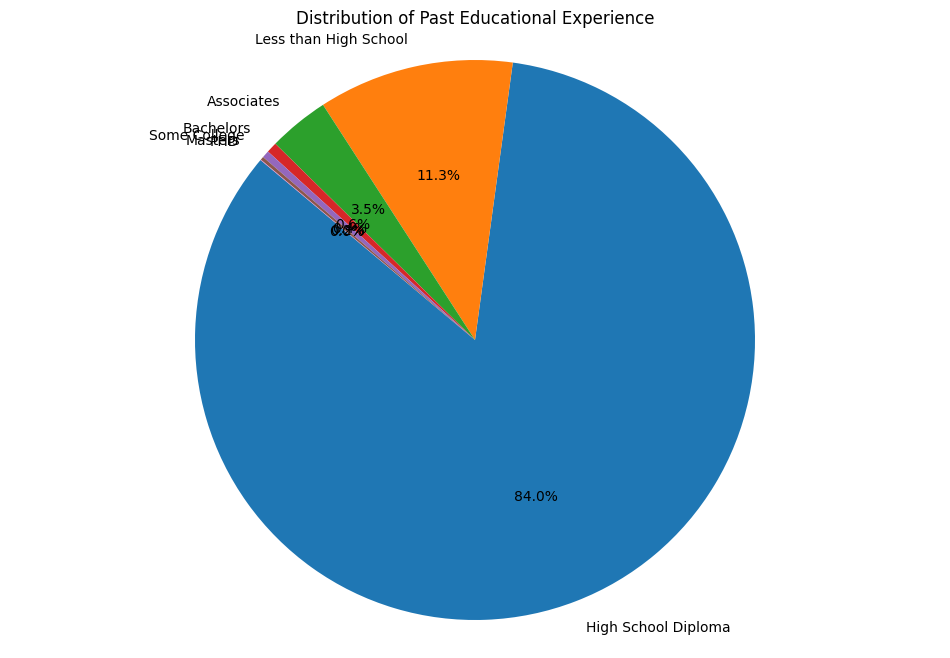

In [101]:
# Mapping of previous qualification codes to their descriptions
qualification_mapping = {
    1: 'High School Diploma',
    2: "Bachelors",
    3: 'Associates',
    4: 'Masters',
    5: 'PHD',
    6: 'Some College',
    7: 'Less than High School',
}

# Replace the codes in the 'Previous qualification' column with their descriptions
df['Previous qualification'] = df['Previous qualification'].map(qualification_mapping)

# Count the occurrences of each Previous qualification
previous_qualification_counts = df['Previous qualification'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(previous_qualification_counts, labels=previous_qualification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Past Educational Experience')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

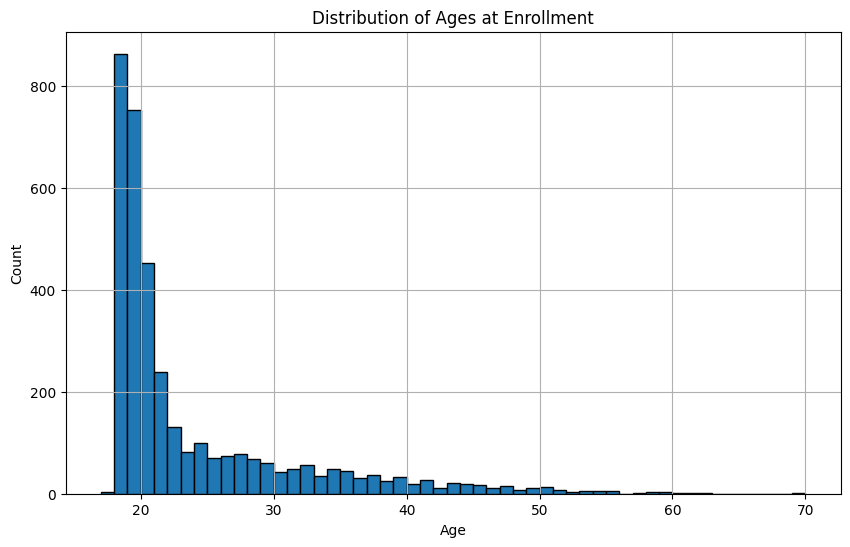

In [93]:
# Create a histogram of the count of different ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age at enrollment'], bins=range(int(df['Age at enrollment'].min()), int(df['Age at enrollment'].max()) + 1), edgecolor='black')
plt.title('Distribution of Ages at Enrollment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [111]:
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=['Option 1', 'Option 2', 'Option 3'],
    value='Option 1',  # Default value
    description='Choose:',
    disabled=False,
)

# Function to capture the selected value
def on_change(change):
    print("You selected:", change['new'])

# Link the function to the dropdown
dropdown.observe(on_change, names='value')

# Display the dropdown
display(dropdown)

Dropdown(description='Choose:', options=('Option 1', 'Option 2', 'Option 3'), value='Option 1')

## Appendix

### Data Key

Marital status: Categorical variable indicating the marital status of the individual.

1 – single 
2 – married 
3 – widower 
4 – divorced 
5 – facto union 
6 – legally separated

Application mode: Categorical variable indicating the mode of application.

1 - 1st phase - general contingent 
2 - Ordinance No. 612/93 
5 - 1st phase - special contingent (Azores Island) 
7 - Holders of other higher courses 
10 - Ordinance No. 854-B/99 
15 - International student (bachelor) 
16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 
18 - 3rd phase - general contingent 
26 - Ordinance No. 533-A/99, item b2) (Different Plan) 
27 - Ordinance No. 533-A/99, item b3 (Other Institution) 
39 - Over 23 years old 
42 - Transfer 
43 - Change of course 
44 - Technological specialization diploma holders 
51 - Change of institution/course
53 - Short cycle diploma holders 
57 - Change of institution/course (International

Application order: Numeric variable indicating the order of application.

between 0 - first choice; and 9 last choice

evening attendance: Binary variable indicating whether the individual attends classes during the daytime or evening.
1 for daytime
0 for evening

Previous qualification: Numeric variable indicating the level of the previous qualification

1 - High School 
2 - Bachelors
3 - Associates
4 - Masters
5 - PHD
6 - Some college
7 - Less than High School Diploma

Nationality: Categorical variable indicating the nationality of the individual.

1 - American
2 - German
6 - Spanish
11 - Italian
13 - Dutch
14 - English
17 - Lithuanian
21 - Angolan
22 - Cape Verdean
24 - Guinean
25 - Mozambican
26 - Santomean
32 - Turkish
41 - Brazilian
62 - Romanian
100 - Moldova (Republic of)
101 - Mexican
103 - Ukrainian
105 - Russian
108 - Cuban
109 - Colombian

Mother's qualification: Numeric variable indicating the level of the mother's qualification.

1 - Secondary Education - 12th Year of Schooling or Eq. 
2 - Higher Education - Bachelor's Degree 
3 - Higher Education - Degree 
4 - Higher Education - Master's 
5 - Higher Education - Doctorate 
6 - Frequency of Higher Education 
9 - 12th Year of Schooling - Not Completed 
10 - 11th Year of Schooling - Not Completed 
11 - 7th Year (Old) 
12 - Other - 11th Year of Schooling 
14 - 10th Year of Schooling 18 - General commerce course 
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
22 - Technical-professional course 
26 - 7th year of schooling 
27 - 2nd cycle of the general high school course 
29 - 9th Year of Schooling - Not Completed 
30 - 8th year of schooling 
34 - Unknown 
35 - Can't read or write 
36 - Can read without having a 4th year of schooling 
37 - Basic education 1st cycle (4th/5th year) or equiv. 
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
39 - Technological specialization course 
40 - Higher education - degree (1st cycle) 
41 - Specialized higher studies course 
42 - Professional higher technical course 
43 - Higher Education - Master (2nd cycle) 
44 - Higher Education - Doctorate (3rd cycle)

Father's qualification: Numeric variable indicating the level of the father's qualification.

1 - Secondary Education - 12th Year of Schooling or Eq. 
2 - Higher Education - Bachelor's Degree 
3 - Higher Education - Degree 
4 - Higher Education - Master's 
5 - Higher Education - Doctorate 
6 - Frequency of Higher Education 
9 - 12th Year of Schooling - Not Completed 
10 - 11th Year of Schooling - Not Completed 
11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 
13 - 2nd year complementary high school course 
14 - 10th Year of Schooling 18 - General commerce course 
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
20 - Complementary High School Course 
22 - Technical-professional course 
25 - Complementary High School Course - not concluded 
26 - 7th year of schooling 
27 - 2nd cycle of the general high school course 
29 - 9th Year of Schooling - Not Completed 
30 - 8th year of schooling 
31 - General Course of Administration and Commerce 
33 - Supplementary Accounting and Administration 
34 - Unknown 35 - Can't read or write 
36 - Can read without having a 4th year of schooling 
37 - Basic education 1st cycle (4th/5th year) or equiv. 
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
39 - Technological specialization course 
40 - Higher education - degree (1st cycle) 
41 - Specialized higher studies course 
42 - Professional higher technical course 
43 - Higher Education - Master (2nd cycle) 
44 - Higher Education - Doctorate (3rd cycle)).


Mother's occupation: Categorical variable indicating the mother's occupation.

0 - Student 
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 
2 - Specialists in Intellectual and Scientific Activities 
3 - Intermediate Level Technicians and Professions 
4 - Administrative staff 
5 - Personal Services, Security and Safety Workers and Sellers 
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 
7 - Skilled Workers in Industry, Construction and Craftsmen 
8 - Installation and Machine Operators and Assembly Workers 
9 - Unskilled Workers 
10 - Armed Forces Professions 
90 - Other Situation 
99 - (blank)
122 - Health professionals 
123 - teachers 
125 - Specialists in information and communication technologies (ICT) 
131 - Intermediate level science and engineering technicians and professions 
132 - Technicians and professionals, of intermediate level of health 
134 - Intermediate level technicians from legal, social, sports, cultural and similar services 
141 - Office workers, secretaries in general and data processing operators 
143 - Data, accounting, statistical, financial services and registry-related operators 
144 - Other administrative support staff 151 - personal service workers 
152 - sellers 
153 - Personal care workers and the like 
171 - Skilled construction workers and the like, except electricians 
173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 
175 - Workers in food processing, woodworking, clothing and other industries and crafts 
191 - cleaning workers 
192 - Unskilled workers in agriculture, animal production, fisheries and forestry 
193 - Unskilled workers in extractive industry, construction, manufacturing and transport 
194 - Meal preparation assistants

Father's occupation: Categorical variable indicating the father's occupation.

0 - Student 
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 
2 - Specialists in Intellectual and Scientific Activities 
3 - Intermediate Level Technicians and Professions 
4 - Administrative staff 
5 - Personal Services, Security and Safety Workers and Sellers 
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 
7 - Skilled Workers in Industry, Construction and Craftsmen 
8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 
10 - Armed Forces Professions 
90 - Other Situation 
99 - (blank) 
101 - Armed Forces Officers 
102 - Armed Forces Sergeants 
103 - Other Armed Forces personnel 
112 - Directors of administrative and commercial services 
114 - Hotel, catering, trade and other services directors 
121 - Specialists in the physical sciences, mathematics, engineering and related techniques 
122 - Health professionals 
123 - teachers 
124 - Specialists in finance, accounting, administrative organization, public and commercial relations 
131 - Intermediate level science and engineering technicians and professions 
132 - Technicians and professionals, of intermediate level of health 
134 - Intermediate level technicians from legal, social, sports, cultural and similar services 
135 - Information and communication technology technicians 
141 - Office workers, secretaries in general and data processing operators 
143 - Data, accounting, statistical, financial services and registry-related operators 
144 - Other administrative support staff 
151 - personal service workers 
152 - sellers 
153 - Personal care workers and the like 
154 - Protection and security services personnel 
161 - Market-oriented farmers and skilled agricultural and animal production workers 
163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 
171 - Skilled construction workers and the like, except electricians 
172 - Skilled workers in metallurgy, metalworking and similar 
174 - Skilled workers in electricity and electronics 
175 - Workers in food processing, woodworking, clothing and other industries and crafts 
181 - Fixed plant and machine operators 
182 - assembly workers 
183 - Vehicle drivers and mobile equipment operators 
192 - Unskilled workers in agriculture, animal production, fisheries and forestry 
193 - Unskilled workers in extractive industry, construction, manufacturing and transport 
194 - Meal preparation assistants 
195 - Street vendors (except food) and street service providers

Educational special needs: Binary variable indicating whether the individual has educational special needs 
1 for yes, 0 for no

Debtor: Binary variable indicating whether the individual is a debtor 
(1 for yes, 0 for no).

Tuition fees up to date: 
Binary variable indicating whether the tuition fees are up to date 
(1 for yes, 0 for no).

Gender: 
Binary variable indicating the gender of the individual 
(1 for male, 0 for female).

Scholarship holder: Binary variable indicating whether the individual holds a scholarship 
(1 for yes, 0 for no).

Age at enrollment: Numeric variable indicating the age of the individual at the time of enrollment.

International: Binary variable indicating whether the individual is international 
(1 for yes, 0 for no).

Curricular units 1st sem (credited): 
The number of course units (or credits) that were successfully completed and credited in the first semester.

Curricular units 1st sem (enrolled): 
The number of course units that a student was enrolled in during the first semester.

Curricular units 1st sem (evaluations): 
The number of assessments or exams taken for course units in the first semester.

Curricular units 1st sem (approved): 
The number of course units that were successfully passed in the first semester.

Curricular units 1st sem (grade): 
The average grade obtained across all course units in the first semester.

Curricular units 1st sem (without evaluations): 
The number of course units in the first semester that did not have any assessments or exams.

Curricular units 2nd sem (credited): 
The number of course units (or credits) that were successfully completed and credited in the second semester.

Curricular units 2nd sem (enrolled): 
The number of course units that a student was enrolled in during the second semester.

Curricular units 2nd sem (evaluations): 
The number of assessments or exams taken for course units in the second semester.

Curricular units 2nd sem (approved): 
The number of course units that were successfully passed in the second semester.


Curricular units 2nd sem (grade): 
The average grade obtained across all course units in the second semester.

Curricular units 2nd sem (without evaluations): 
The number of course units in the second semester that did not have any assessments or exams.

Unemployment rate: 
variable indicating the unemployment rate(Unemployment rate (%)).

Inflation rate: 
Numeric variable indicating the inflation rate(Inflation rate (%)).

GDP: 
Numeric variable indicating the Gross Domestic Product.

output: 
Categorical variable indicating the target variable (e.g., Dropout, Graduate, Enrolled).